## Pandas

http://pandas.pydata.org/

Data analysis library that introduces the concepts of data-frames and series to Python. Powerful tool for time-series analysis and fast visualizations of data.

Excellent introduction by the author: https://vimeo.com/59324550


### Software development rigor applied to spread-sheets.

http://www.eusprig.org/horror-stories.htm


See pages 131-132 of the JP Morgan Task Force Report "...further errors were discovered in the Basel II.5 model, including, most significantly, an operational error in the calculation of the relative changes in hazard rates and correlation estimates. Specifically, after subtracting the old rate from the new rate, the spreadsheet divided by their sum instead of their average, as the modeler had intended. This error likely had the effect of muting volatility by a factor of two and of lowering the VaR" 

As reported in "A tempest in a spreadsheet" http://ftalphaville.ft.com/2013/01/17/1342082/a-tempest-in-a-spreadsheet/? Lisa Pollack comments "On a number of occasions, he asked the trader to whom he reported for additional resources to support his work on the VaR model, but he did not receive any. Also it appears that he (had to?) cut a number of corners, which resulted increased operational risk and artificially low volatility numbers ... pressure was put on the reviewers to get on with approving the model"

- - - 

In [205]:
import pandas as pd
import numpy as np

### Dataframes

A flexible data structure for tabular data manipulation.


In [206]:
data = np.random.rand(5, 5)
data

array([[ 0.49640162,  0.15792882,  0.69197688,  0.58497456,  0.49064201],
       [ 0.36393812,  0.04241514,  0.00298786,  0.24298501,  0.86178583],
       [ 0.89915732,  0.86326516,  0.45698596,  0.90593047,  0.88521638],
       [ 0.15656001,  0.01057392,  0.46425515,  0.31067496,  0.72581755],
       [ 0.89082774,  0.80660907,  0.76120486,  0.82124886,  0.37219309]])

Matrix representation of data, proivided by numpy, often isn't enough and this is where Pandas can help, through the introduction of a "data-frame", which is a tabular representation.

In [207]:
pd.DataFrame(data)

,0,1,2,3,4
0,0.496402,0.157929,0.691977,0.584975,0.490642
1,0.363938,0.042415,0.002988,0.242985,0.861786
2,0.899157,0.863265,0.456986,0.905930,0.885216
3,0.156560,0.010574,0.464255,0.310675,0.725818
4,0.890828,0.806609,0.761205,0.821249,0.372193


In [208]:
table = pd.DataFrame(data, columns=["a","b","c","d","e"])
table

,a,b,c,d,e
0,0.496402,0.157929,0.691977,0.584975,0.490642
1,0.363938,0.042415,0.002988,0.242985,0.861786
2,0.899157,0.863265,0.456986,0.905930,0.885216
3,0.156560,0.010574,0.464255,0.310675,0.725818
4,0.890828,0.806609,0.761205,0.821249,0.372193


Note the automatic selection of an index (left hand column). This can be used to pull out rows of interest.

In [209]:
table.ix[0]

a    0.496402
b    0.157929
c    0.691977
d    0.584975
e    0.490642
Name: 0, dtype: float64

Similarly we can select data from columns.

In [210]:
table["a"]

0    0.496402
1    0.363938
2    0.899157
3    0.156560
4    0.890828
Name: a, dtype: float64

In [211]:
table[["a","e"]]

,a,e
0,0.496402,0.490642
1,0.363938,0.861786
2,0.899157,0.885216
3,0.156560,0.725818
4,0.890828,0.372193


A table behave similarly to a numpy array (in fact underneath it is a nd-array), meaning we can use fancy indexing:

In [212]:
missing_data = table[table > 0.6]
missing_data

,a,b,c,d,e
0,NaN,NaN,0.691977,NaN,NaN
1,NaN,NaN,NaN,NaN,0.861786
2,0.899157,0.863265,NaN,0.905930,0.885216
3,NaN,NaN,NaN,NaN,0.725818
4,0.890828,0.806609,0.761205,0.821249,NaN


Q1. What are the summary statistics of the "missing_data" table?

In [213]:
missing_data.describe()

,a,b,c,d,e
count,2.000000,2.000000,2.000000,2.000000,3.000000
mean,0.894993,0.834937,0.726591,0.863590,0.824273
std,0.005890,0.040062,0.048952,0.059879,0.086066
min,0.890828,0.806609,0.691977,0.821249,0.725818
25%,0.892910,0.820773,0.709284,0.842419,0.793802
50%,0.894993,0.834937,0.726591,0.863590,0.861786
75%,0.897075,0.849101,0.743898,0.884760,0.873501
max,0.899157,0.863265,0.761205,0.905930,0.885216


In [214]:
missing_data.count()

a    2
b    2
c    2
d    2
e    3
dtype: int64

In [215]:
missing_data.min()

a    0.890828
b    0.806609
c    0.691977
d    0.821249
e    0.725818
dtype: float64

Visualization of data is made simple with pandas (for simple plots).

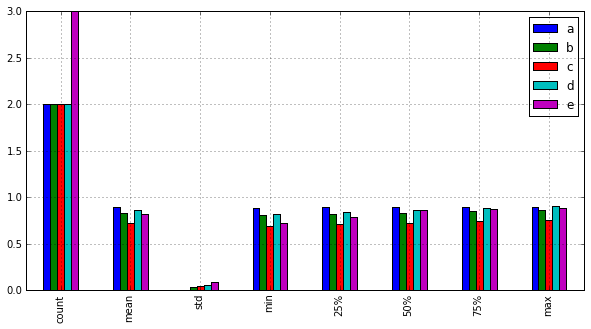

In [216]:
%matplotlib inline

missing_data.describe().plot(kind='bar', figsize=(10,5))

### Time series

Pandas has an extensive set of functions for working with time series.

http://pandas.pydata.org/pandas-docs/dev/timeseries.html#time-series-date-functionality

Creating a time series of data requires a time based index.

In [217]:
dates = pd.date_range(start="1/1/14", end="31/12/14")
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-01-01, ..., 2014-12-31]
Length: 365, Freq: D, Timezone: None

In [218]:
values = np.sin(np.linspace(0,2*np.pi,365)) * np.random.rand(365)
values[:10]

array([ 0.        ,  0.00193675,  0.02843704,  0.00729956,  0.01118412,
        0.00334096,  0.01420008,  0.09660427,  0.08553253,  0.05617443])

In [219]:
time_series = pd.Series(index=dates, data=values)
time_series.head()

2014-01-01    0.000000
2014-01-02    0.001937
2014-01-03    0.028437
2014-01-04    0.007300
2014-01-05    0.011184
Freq: D, dtype: float64

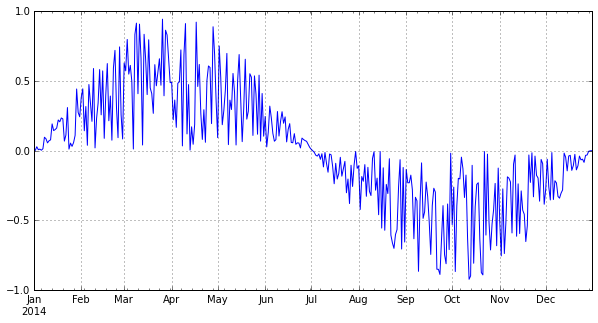

In [220]:
time_series.plot(figsize=(10,5))

Q2. Whats the monthly variation of the time-series. Smooth out the noise by downsampling - **note any change in the signal**.

http://pandas.pydata.org/pandas-docs/dev/timeseries.html#up-and-downsampling

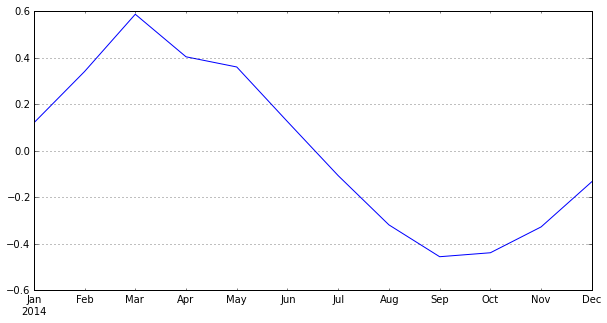

In [221]:
time_series.resample("M").plot(figsize=(10,5))

### Split - Apply - Combine

A powerful concept that will help you to perform complex operations on datasets.

http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [222]:
dates = pd.date_range(start="1/1/14", end="31/12/14")

categories = ["a", "b", "c", "d"]
noisey_signal = np.c_[np.sin(np.linspace(0, 2*np.pi, 365)) * np.random.rand(365)]
data = np.hstack([0.5 * noisey_signal, 3.5 * noisey_signal, 0.01 * noisey_signal, noisey_signal])
table = pd.DataFrame(data=data, columns=categories)

table["date"] = dates
table["month"] = [x.strftime("%B") for x in dates]

table.head()

,a,b,c,d,date,month
0,0.000000,0.000000,0.000000,0.000000,2014-01-01,January
1,0.008044,0.056306,0.000161,0.016088,2014-01-02,January
2,0.000383,0.002683,0.000008,0.000767,2014-01-03,January
3,0.025439,0.178076,0.000509,0.050879,2014-01-04,January
4,0.009020,0.063142,0.000180,0.018041,2014-01-05,January


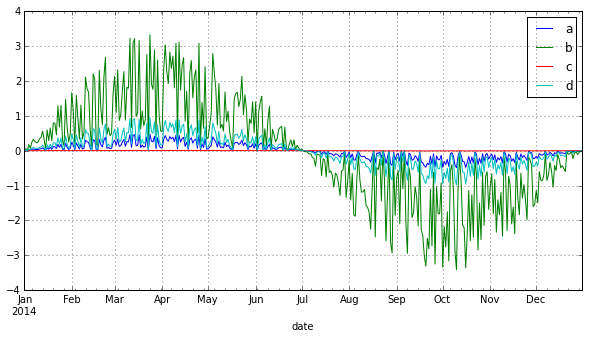

In [223]:
table.set_index("date")[["a","b","c","d"]].plot(figsize=(10,5))

Q3. What are the summary statistics for december?

In [224]:
table[table["month"] == "December"].describe()

,a,b,c,d
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,-6.131126e-02,-4.291788e-01,-1.226225e-03,-1.226225e-01
std,5.576826e-02,3.903778e-01,1.115365e-03,1.115365e-01
min,-2.141967e-01,-1.499377e+00,-4.283934e-03,-4.283934e-01
25%,-9.160220e-02,-6.412154e-01,-1.832044e-03,-1.832044e-01
50%,-6.061513e-02,-4.243059e-01,-1.212303e-03,-1.212303e-01
75%,-1.113576e-02,-7.795035e-02,-2.227153e-04,-2.227153e-02
max,-8.776172e-17,-6.143320e-16,-1.755234e-18,-1.755234e-16


In [244]:
groups = table.groupby("month").describe().loc["December"]

Q4. What are the summary statistics for all months starting with the letter "J".

In [253]:
groups = table.groupby( [x[0] for x in table["month"]] ).describe().loc["J"]
groups

,a,b,c,d
count,92.000000,92.000000,92.000000,92.000000
mean,0.022427,0.156989,0.000449,0.044854
std,0.084506,0.591543,0.001690,0.169012
min,-0.192159,-1.345116,-0.003843,-0.384319
25%,-0.012980,-0.090860,-0.000260,-0.025960
50%,0.018005,0.126035,0.000360,0.036010
75%,0.065635,0.459442,0.001313,0.131269
max,0.222988,1.560914,0.004460,0.445975


Q5. What is the 95 quantile for each month.

In [258]:
table.groupby("month").quantile(.95)

,a,b,c,d
month,,,,
April,0.440272,3.081901,0.008805,0.880543
August,-0.007633,-0.053430,-0.000153,-0.015266
December,-0.001740,-0.012181,-0.000035,-0.003480
February,0.324071,2.268497,0.006481,0.648142
January,0.184225,1.289577,0.003685,0.368451
July,-0.000901,-0.006306,-0.000018,-0.001802
June,0.200527,1.403692,0.004011,0.401055
March,0.459748,3.218233,0.009195,0.919495
May,0.312286,2.186004,0.006246,0.624573


Q5. Plot the monthly statistics for the "a" category.

In [274]:
data = table[["date", "a"]].set_index("date")
data.head()

,a
date,
2014-01-01,0.000000
2014-01-02,0.008044
2014-01-03,0.000383
2014-01-04,0.025439
2014-01-05,0.009020


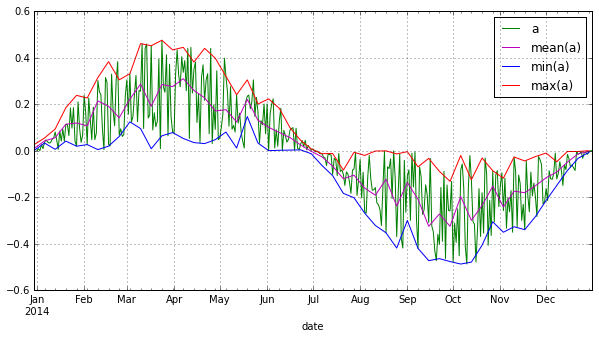

In [276]:
ax = data.plot(figsize=(10,5), color='g')
data.resample('w').plot(color='m', ax=ax)
data.resample('w', how="min").plot(color='b', ax=ax)
data.resample('w', how="max").plot(color='r', ax=ax)
ax.legend(['a', 'mean(a)', 'min(a)', 'max(a)']);

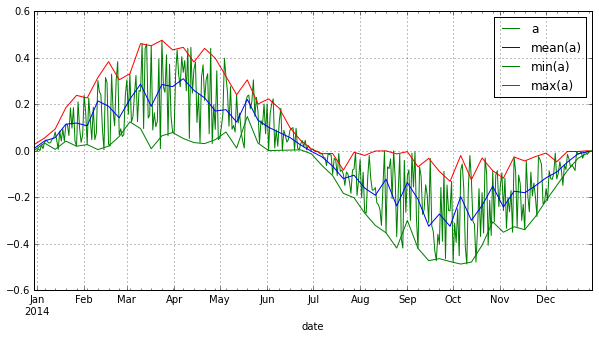

In [285]:
ax = data.plot(figsize=(10,5), color='g')
data.resample("w", how=["mean", "min", "max"]).plot(ax=ax)
ax.legend(['a', 'mean(a)', 'min(a)', 'max(a)']);

# IO

Walk through an example of loading an excel sheet.

http://pandas.pydata.org/pandas-docs/stable/io.html